In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## Model

In [2]:
# Encoder
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )

    def forward(self, x):
        return self.encoder(x)

# Decoder
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=0),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.decoder(x)

# Autoencoder (Encoder + Decoder)
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

## Training the Autoencoder

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 484kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.82MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.09MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10], Loss: 0.0400
Epoch [2/10], Loss: 0.0032
Epoch [3/10], Loss: 0.0023
Epoch [4/10], Loss: 0.0019
Epoch [5/10], Loss: 0.0017
Epoch [6/10], Loss: 0.0015
Epoch [7/10], Loss: 0.0014
Epoch [8/10], Loss: 0.0013
Epoch [9/10], Loss: 0.0012
Epoch [10/10], Loss: 0.0011
Training complete.
Encoder saved as 'encoder.pth'.


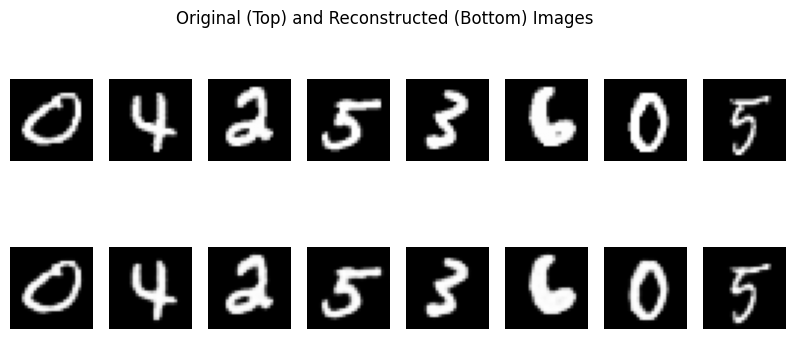

In [3]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
autoencoder = Autoencoder().to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, _ in train_loader:
        images = images.to(device)

        outputs = autoencoder(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

print("Training complete.")

torch.save(autoencoder.encoder.state_dict(), "encoder.pth")
print("Encoder saved as 'encoder.pth'.")


test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=True)
dataiter = iter(test_loader)
images, _ = next(dataiter)
images = images.to(device)

with torch.no_grad():
    reconstructed = autoencoder(images)

images = images.cpu()
reconstructed = reconstructed.cpu()

fig, axes = plt.subplots(2, 8, figsize=(10, 4))

for i in range(8):
    axes[0, i].imshow(images[i].squeeze(), cmap="gray")
    axes[0, i].axis("off")

    axes[1, i].imshow(reconstructed[i].squeeze(), cmap="gray")
    axes[1, i].axis("off")

plt.suptitle("Original (Top) and Reconstructed (Bottom) Images")
plt.show()

Epoch [1/10], Loss: 0.0198
Epoch [2/10], Loss: 0.0032
Epoch [3/10], Loss: 0.0024
Epoch [4/10], Loss: 0.0020
Epoch [5/10], Loss: 0.0017
Epoch [6/10], Loss: 0.0015
Epoch [7/10], Loss: 0.0013
Epoch [8/10], Loss: 0.0012
Epoch [9/10], Loss: 0.0011
Epoch [10/10], Loss: 0.0010
Training complete.
Encoder saved as 'encoder.pth'.


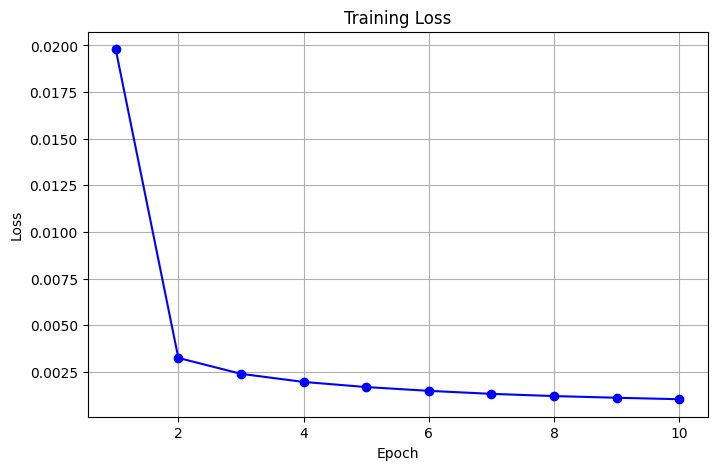

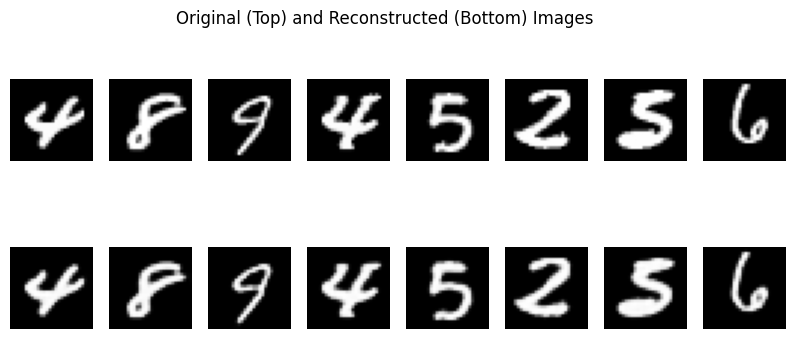

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
autoencoder = Autoencoder().to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

num_epochs = 10
loss_history = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, _ in train_loader:
        images = images.to(device)

        outputs = autoencoder(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    loss_history.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

print("Training complete.")

torch.save(autoencoder.encoder.state_dict(), "encoder.pth")
print("Encoder saved as 'encoder.pth'.")

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), loss_history, marker="o", linestyle="-", color="b")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.grid()
plt.show()

test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=True)
dataiter = iter(test_loader)
images, _ = next(dataiter)
images = images.to(device)

with torch.no_grad():
    reconstructed = autoencoder(images)

images = images.cpu()
reconstructed = reconstructed.cpu()

fig, axes = plt.subplots(2, 8, figsize=(10, 4))

for i in range(8):
    axes[0, i].imshow(images[i].squeeze(), cmap="gray")
    axes[0, i].axis("off")

    axes[1, i].imshow(reconstructed[i].squeeze(), cmap="gray")
    axes[1, i].axis("off")

plt.suptitle("Original (Top) and Reconstructed (Bottom) Images")
plt.show()


## Visualizing a feature vector

<ipython-input-6-483088518361>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder.load_state_dict(torch.load("encoder.pth"))


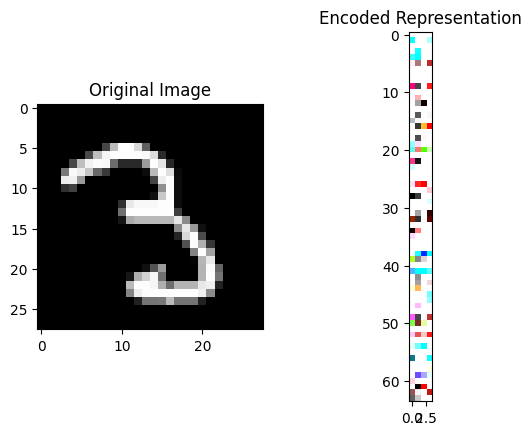

In [6]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder = Encoder().to(device)
encoder.load_state_dict(torch.load("encoder.pth"))
encoder.eval()

transform = transforms.Compose([transforms.ToTensor()])
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

image, _ = next(iter(test_loader))
image = image.to(device)

with torch.no_grad():
    encoded_image = encoder(image)

plt.subplot(1, 2, 1)
plt.imshow(image.cpu().squeeze(), cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(encoded_image.cpu().squeeze().numpy(), cmap="viridis")
plt.title("Encoded Representation")

plt.show()


## Training the Classifier

In [7]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

encoder = Encoder().to(device)
encoder.load_state_dict(torch.load("encoder.pth"))
encoder.eval()

for param in encoder.parameters():
    param.requires_grad = False

# Shallow Classifier
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.LazyLinear(128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

classifier = Classifier().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

# Training
num_epochs = 10

for epoch in range(num_epochs):
    classifier.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        with torch.no_grad():
            features = encoder(images)

        outputs = classifier(features)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

classifier.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        features = encoder(images)
        outputs = classifier(features)

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

<ipython-input-7-3551a8a4166d>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder.load_state_dict(torch.load("encoder.pth"))


Epoch [1/10], Loss: 0.4743
Epoch [2/10], Loss: 0.2595
Epoch [3/10], Loss: 0.2225
Epoch [4/10], Loss: 0.2022
Epoch [5/10], Loss: 0.1801
Epoch [6/10], Loss: 0.1673
Epoch [7/10], Loss: 0.1581
Epoch [8/10], Loss: 0.1468
Epoch [9/10], Loss: 0.1415
Epoch [10/10], Loss: 0.1299
Test Accuracy: 96.15%
